In [1]:
#Imports

#!pip3 install sympy
import matplotlib.pyplot as plt
import numpy as np
import math

# For cleaner outputs
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Output of Matlab code

def s_1(t):
    return (5.6232 + 1.1941j)/t
def s_2(t):
    return (5.0894 + 3.5888j)/t
def s_3(t):
    return (3.9934 + 6.0049j)/t
def s_4(t):
    return (2.2698 + 8.4618j)/t
def s_5(t):
    return (-0.2087 +10.9913j)/t
def s_6(t):
    return (-3.7032 +13.6564j)/t
def s_7(t):
    return (-8.8977 +16.6310j)/t

f_1= 1.0*10**2* (-0.2788 - 1.0215j)
f_3= 1.0*10**2* (0.4694 + 0.4565j)
f_5= 1.0*10**2* (-0.2350 - 0.0581j)
f_7= 1.0*10**2* (0.0481 - 0.0132j)
f_9= 1.0*10**2* (-0.0038 + 0.0034j)
f_11= 1.0*10**2* (0.0001 - 0.0002j)
f_13= 1.0*10**2* (-0.0000 + 0.0000j)

In [3]:
#Input variables

R=250
D_e=6.4*10**(2) 
D_i=(1/52)*D_e
R_P=17.78*10**(3) 
c_e=2

r_steps=np.arange(0, R+50, 1)
t_steps=np.arange(0,61,10)

In [4]:
#Definitions

def A_1(r,s_k):
    return -(R**2*np.sinh(r*np.sqrt(s_k/D_i)))/(r*D_i*(np.cosh(np.sqrt(s_k/D_i)*R)*R*np.sqrt(s_k/D_i)-np.sinh(R*np.sqrt(s_k/D_i))))
    
def A_2(r,s_k):
    return (R**2*(np.sqrt(s_k/D_e)*R_P*np.cosh(np.sqrt(s_k/D_e)*(r-R_P))+np.sinh(np.sqrt(s_k/D_e)*(r-R_P))))/(r*(D_e*np.sqrt(s_k/D_e)*(R_P-R)*np.cosh(np.sqrt(s_k/D_e)*(R_P-R))+(s_k*R_P*R-D_e)*np.sinh(np.sqrt(s_k/D_e)*(R_P-R))))
    
def inverse(r,t):
    if t==0:
        if r <= R:
            return 0
        else:
            return c_e
    else:
        if r > R:
            return c_e-(2*((f_1*A_2(r,s_1(t))*(c_e/s_1(t))/(t*(A_1(r,s_1(t))-A_2(r,s_1(t)))))+\
                (f_3*A_2(r,s_2(t))*(c_e/s_2(t))/(t*(A_1(r,s_2(t))-A_2(r,s_2(t)))))+\
                (f_5*A_2(r,s_3(t))*(c_e/s_3(t))/(t*(A_1(r,s_3(t))-A_2(r,s_3(t)))))+\
                (f_7*A_2(r,s_4(t))*(c_e/s_4(t))/(t*(A_1(r,s_4(t))-A_2(r,s_4(t)))))+\
                (f_9*A_2(r,s_5(t))*(c_e/s_5(t))/(t*(A_1(r,s_5(t))-A_2(r,s_5(t)))))+\
                (f_11*A_2(r,s_6(t))*(c_e/s_6(t))/(t*(A_1(r,s_6(t))-A_2(r,s_6(t)))))+\
                (f_13*A_2(r,s_7(t))*(c_e/s_7(t))/(t*(A_1(r,s_7(t))-A_2(r,s_7(t)))))).real)
        else:
            return (-2)*((f_1*A_1(r,s_1(t))*(c_e/s_1(t))/(t*(A_1(r,s_1(t))-A_2(r,s_1(t)))))+\
    (f_3*A_1(r,s_2(t))*(c_e/s_2(t))/(t*(A_1(r,s_2(t))-A_2(r,s_2(t)))))+\
    (f_5*A_1(r,s_3(t))*(c_e/s_3(t))/(t*(A_1(r,s_3(t))-A_2(r,s_3(t)))))+\
    (f_7*A_1(r,s_4(t))*(c_e/s_4(t))/(t*(A_1(r,s_4(t))-A_2(r,s_4(t)))))+\
    (f_9*A_1(r,s_5(t))*(c_e/s_5(t))/(t*(A_1(r,s_5(t))-A_2(r,s_5(t)))))+\
    (f_11*A_1(r,s_6(t))*(c_e/s_6(t))/(t*(A_1(r,s_6(t))-A_2(r,s_6(t)))))+\
    (f_13*A_1(r,s_7(t))*(c_e/s_7(t))/(t*(A_1(r,s_7(t))-A_2(r,s_7(t)))))).real

In [5]:
#Running the model for every r and t

sol=np.zeros((r_steps.size,t_steps.size))

for (i,r) in enumerate(r_steps):
    for (j,t) in enumerate(t_steps):
        sol[i,j]=inverse(r,t)

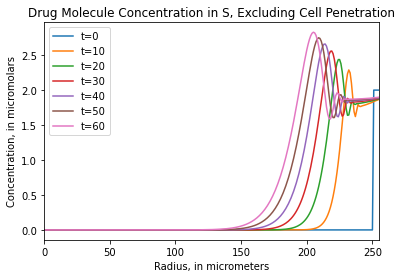

In [6]:
#Plotting the result

plt.plot(r_steps,sol)
plt.xlim([0,255])
plt.xlabel('Radius, in micrometers')
plt.ylabel('Concentration, in micromolars')
plt.gca().legend(('t=0','t=10','t=20','t=30', 't=40','t=50','t=60'))
plt.title('Drug Molecule Concentration in S, Excluding Cell Penetration')
#plt.savefig('PlotModel1_finalplot.png')
plt.show()